In [1]:
import pandas as pd
df = pd.read_csv("../week2.csv")
df.head()

,Date,Close Price,Open Price,High Price,Low Price,Total Traded Quantity,TTQ,Month,Year,Day_Perc_Change,Trend
0,2019-10-24,139.94,139.14,140.40,138.69,37.28M,37280000.0,10,2019,0.000000,Slight or No change
1,2019-10-23,137.24,136.88,137.45,135.61,31.38M,31380000.0,10,2019,-0.019294,Slight or No change
2,2019-10-22,136.37,138.97,140.01,136.26,27.94M,27940000.0,10,2019,-0.006339,Slight or No change
3,2019-10-21,138.43,138.45,138.50,137.01,20.72M,20720000.0,10,2019,0.015106,Slight or No change
4,2019-10-18,137.41,139.76,140.00,136.56,32.28M,32280000.0,10,2019,-0.007368,Slight or No change


In [2]:
df.dtypes

Date                      object
Close Price              float64
Open Price               float64
High Price               float64
Low Price                float64
Total Traded Quantity     object
TTQ                      float64
Month                      int64
Year                       int64
Day_Perc_Change          float64
Trend                     object
dtype: object

In [3]:
# 1.1 convert date to datetime64, set date as index and plot closing price for each day
df.Date = df.Date.astype("datetime64")
df.dtypes

Date                     datetime64[ns]
Close Price                     float64
Open Price                      float64
High Price                      float64
Low Price                       float64
Total Traded Quantity            object
TTQ                             float64
Month                             int64
Year                              int64
Day_Perc_Change                 float64
Trend                            object
dtype: object

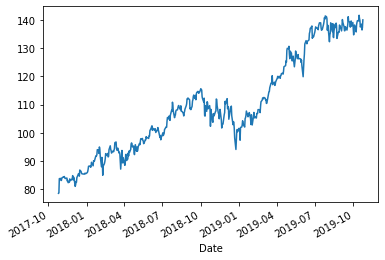

In [4]:
df.set_index("Date",inplace = True)
%matplotlib inline
df["Close Price"].plot()

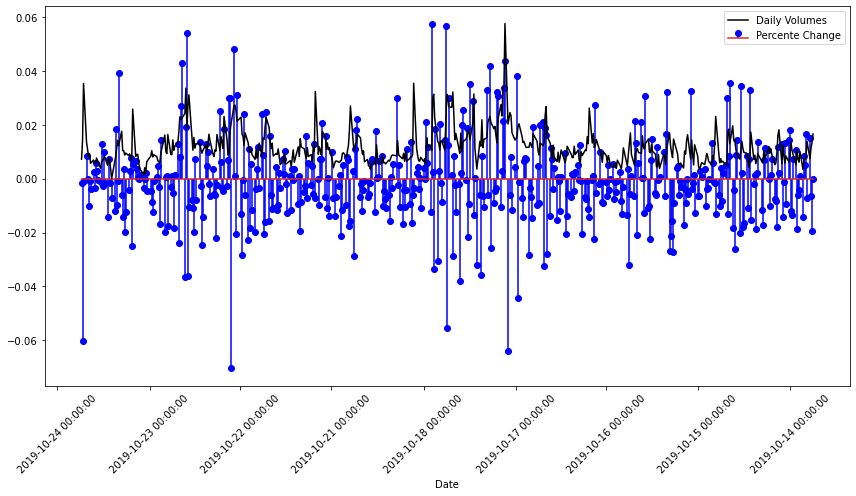

In [5]:
import matplotlib.pyplot as plt
scaledvolume =  df["TTQ"] - df["TTQ"].min()
scaledvolume = scaledvolume/scaledvolume.max() * df.Day_Perc_Change.max()

fig, ax = plt.subplots(figsize=(12, 6))

ax.stem(df.index, df.Day_Perc_Change , 'b', markerfmt='bo', label='Percente Change',use_line_collection=True)
ax.plot(df.index, scaledvolume, 'k', label='Daily Volumes')

ax.set_xlabel('Date')
plt.legend()

plt.tight_layout()
plt.xticks(plt.xticks()[0], df.index, rotation=45)
plt.show()

([<matplotlib.patches.Wedge at 0x27bc0324b38>],
 [Text(-1.1, 1.3471114790620887e-16, 'No Change')],
 [Text(-0.6, 7.347880794884119e-17, '100.0%')])

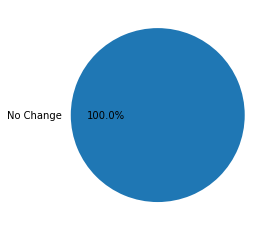

In [6]:
gb = df.groupby(by='Trend')
labels = ['No Change']
plt.pie(gb.Trend.agg('count'),labels=labels,autopct='%0.1f%%')

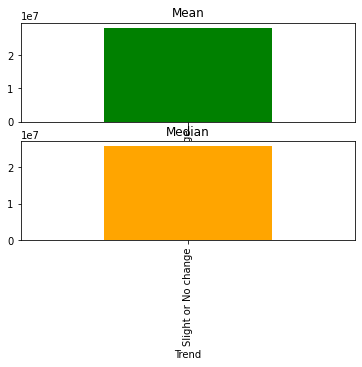

In [7]:
plt.subplot(211)
avg_trends=gb.agg('mean')
avg_trends['TTQ'].plot(kind='bar',title='Mean',color='green')

plt.subplot(212)
median_trends=gb.agg('median')
median_trends['TTQ'].plot(kind='bar',title='Median',color='orange')

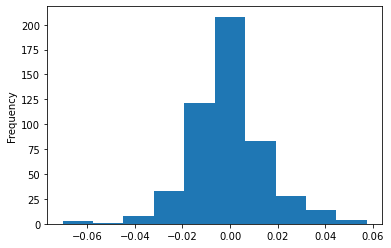

In [8]:
# 2.5 histogram
df['Day_Perc_Change'].plot.hist()

In [9]:
# 2.6 read_csv of 5 stocks and prepare correlation plot of each Close Price
df_hdfc = pd.read_csv("E:/Aspirations.ai/Large_Cap/HDFC.csv")
df_itc = pd.read_csv("E:/Aspirations.ai/Large_Cap/ITC.csv")
df_reliance = pd.read_csv("E:/Aspirations.ai/Large_Cap/RELIANCE.csv")
df_tcs = pd.read_csv("E:/Aspirations.ai/Large_Cap/TCS.csv")
df_titan = pd.read_csv("E:/Aspirations.ai/Large_Cap/TITAN.csv")

In [10]:
large_caps = [df_hdfc,df_itc,df_reliance,df_tcs,df_titan]
for stock in large_caps:
    stock = stock[stock['Series']=='EQ']

In [11]:
df1 = df.reset_index()

In [12]:
df_combined = pd.concat([df1["Close Price"],df_hdfc["Close Price"],df_itc["Close Price"],
                        df_reliance["Close Price"],df_tcs["Close Price"],df_titan["Close Price"]],axis=1)
df_combined = df_combined[:503]
df_combined.columns = ['MSFT','HDFC','ITC','RELIANCE','TCS','TITAN']

df_combined.head()

,MSFT,HDFC,ITC,RELIANCE,TCS,TITAN
0,139.94,1559.50,277.95,1344.10,2365.10,483.65
1,137.24,205.00,283.45,1356.30,2429.15,488.30
2,136.37,1566.55,281.65,1353.10,2455.35,481.75
3,138.43,1552.50,277.90,1327.35,2536.20,471.65
4,137.41,207.00,286.20,1318.85,2507.15,471.15


In [13]:
df_combined_pct =  df_combined.pct_change()[1:]
df_combined_pct.head()

,MSFT,HDFC,ITC,RELIANCE,TCS,TITAN
1,-0.019294,-0.868548,0.019788,0.009077,0.027081,0.009614
2,-0.006339,6.641707,-0.006350,-0.002359,0.010786,-0.013414
3,0.015106,-0.008969,-0.013314,-0.019030,0.032928,-0.020965
4,-0.007368,-0.866667,0.029867,-0.006404,-0.011454,-0.001060
5,0.016593,6.425362,0.060797,0.004019,0.009652,0.021755


<Figure size 432x288 with 0 Axes>

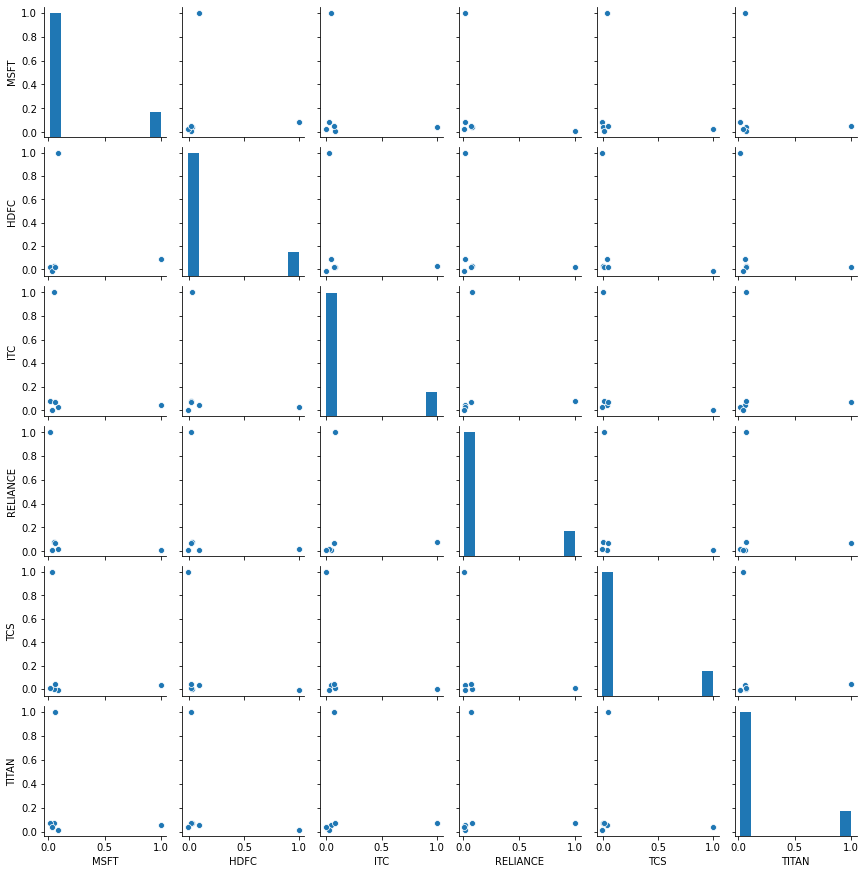

In [14]:
import seaborn as sns
df_corr=df_combined_pct.corr(method='pearson')
plt.figure(4)
sns.pairplot(df_corr, height=2);
plt.show()

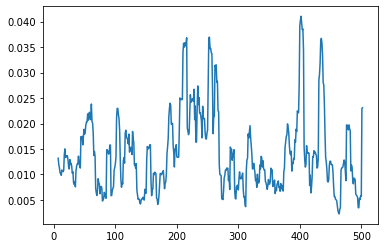

In [15]:
# 2.7 Volatility
df_msft_rolling = df_combined_pct['MSFT'].rolling(7).std()
plt.plot(df_msft_rolling)
plt.show()

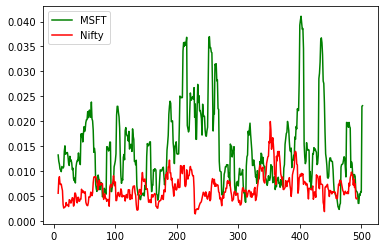

In [16]:
# 2.8 Volatility for Nifty
df_nifty = pd.read_csv("E:/Aspirations.ai/Nifty50/Nifty50.csv")
df_nifty = df_nifty["Close"].pct_change()[1:]
df_nifty_rolling = df_nifty.rolling(7).std()
plt.plot(df_msft_rolling,label='MSFT',color='g')
plt.plot(df_nifty_rolling,label='Nifty',color='r')
plt.legend()

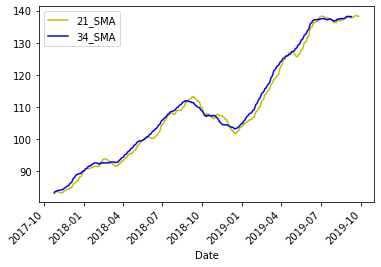

SELL


In [17]:
# 2.9 Trade Calls
import pandas as pd
df_roll_21 = df["Close Price"].rolling(21).mean()
df_roll_34 = df["Close Price"].rolling(34).mean()
ax1=df_roll_21.plot(label='21_SMA',color='y')
ax2= df_roll_34.plot(label='34_SMA',color='b')

plt.legend()
plt.xticks(rotation = 45)
plt.show()
if df_roll_21.iloc[10] > df_roll_34.iloc[10]:
    print("BUY")
else:
    print("SELL")

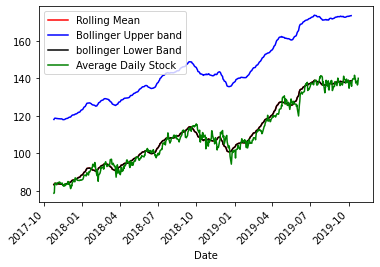

In [19]:
# 2.10 Trade Calls using Bollinger Bands
df_roll = df["Close Price"].rolling(14).mean()
df_std = df["Close Price"].std()
df_upper = df_roll + (2*df_std)
df_lower = df_roll - (2 * df_std)

ax1 = df_roll.plot(label="Rolling Mean",color = 'r')
ax2 = df_upper.plot(label="Bollinger Upper band",color = 'b')
ax3 = df_roll.plot(label="bollinger Lower Band",color = 'k')
ax4 = df["Close Price"].plot(label="Average Daily Stock",color='g')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [20]:
df['Rolling_14']=df_roll
df['upper_bollinger']=df_upper
df['lower_bollinger']=df_lower

In [21]:
df.head()

,Close Price,Open Price,High Price,Low Price,Total Traded Quantity,TTQ,Month,Year,Day_Perc_Change,Trend,Rolling_14,upper_bollinger,lower_bollinger
Date,,,,,,,,,,,,,
2019-10-24,139.94,139.14,140.40,138.69,37.28M,37280000.0,10,2019,0.000000,Slight or No change,NaN,NaN,NaN
2019-10-23,137.24,136.88,137.45,135.61,31.38M,31380000.0,10,2019,-0.019294,Slight or No change,NaN,NaN,NaN
2019-10-22,136.37,138.97,140.01,136.26,27.94M,27940000.0,10,2019,-0.006339,Slight or No change,NaN,NaN,NaN
2019-10-21,138.43,138.45,138.50,137.01,20.72M,20720000.0,10,2019,0.015106,Slight or No change,NaN,NaN,NaN
2019-10-18,137.41,139.76,140.00,136.56,32.28M,32280000.0,10,2019,-0.007368,Slight or No change,NaN,NaN,NaN


In [22]:
df.to_csv('../week3.csv', index = False)